---
# Examen M208 - Évolution de la population de crocodiles
___

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Liens rapides vers les différentes parties
* [Indications](#indic)
    * [Exemple de courbe (matplotlib)](#exemple_c)
* [I - Premiers modèles de population](#modeles0)
    * [IA - Première approche](#approche0)
    * [IB - Modèle Adulte/enfant/nouveaux nés](#modeleAEO)
* [II - Prise en compte du sexe des crocodiles](#sexe)
    * [IIA - Prise en compte dans la reproduction](#modele_HM)
    * [IIB - Détermination du sexe par la température (TSD)](#modele_TSD)
* [III - Impact d'une crise environnementale](#modele_crise)
    
<a id="indic"></a>
## Indications
 
<div style="color : black;background:#f5c5c8; border-radius:5px; padding: 8px; margin: 4px;">
Voici comment sont affichés les éléments importants.
</div>
<div style="color : #414141;background:#c5f5da; border-radius:5px; padding: 8px; margin: 4px; font-style: italic;">
Ce qui est en vert ou en italique n'est pas utile pour répondre aux questions mais sert juste à comprendre d'où proviennent les formules.
</div>

Les **questions** sont en gras.

L'examen sera noté sur 24 points (au moins) ; il faut mieux faire peu de questions complétement que de répondre mal à beaucoup de question. Enfin, la présence de documentation ou de commentaires sera valorisée.

<a id="exemple_c"></a>
## Exemple de courbe (matplotlib)
Voici un exemple de tracé de courbes dont vous pourrez vous inspirer pour les questions suivantes

Text(0.5,1,'fonctions trigonomètriques')

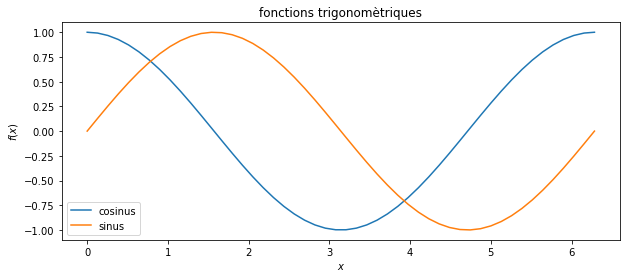

In [2]:
fig, ax = plt.subplots(1,1,figsize=(10,4))

X=np.linspace(0,2*np.pi)
ax.plot(X,np.cos(X),label="cosinus")
ax.plot(X,np.sin(X),label="sinus")
ax.legend()
ax.set_ylabel("$f(x)$")
ax.set_xlabel("$x$")
ax.set_title("fonctions trigonomètriques")

<a id=modeles0> </a>
## I - Premiers modèles de population
<a id=approche0> </a>
### IA - Première approche

La façon la plus simple de décrire la population d'une année à l'autre consiste à ajouter les naissances et retrancher les morts d'une année à l'autre.

<div style="color : black;background:#f5c5c8; border-radius:5px; padding: 8px; margin: 4px;">
Soient $P[k]$ le nombre d'individus au début de l'année $k$, $m$ le taux de mortalité et $n$ le taux de natalité. <p style="font-weight: bold">Alors la population au début de l'année $k+1$ est $P[k+1] = (1 + n - m) \times P[k]$.</p>
</div>
<div style="color : #414141;background:#c5f5da; border-radius:5px; padding: 8px; margin: 4px; font-style: italic;">
Le nombre de nouveaux nés est $n \times P[k]$. Le nombre de morts est $m \times P[k]$. Le nombre total d'individus au début de l'année $k+1$ est donc $P[k] + n \times P[k] - m \times P[k]$.
</div>

Pour cette première partie, $m$ et $n$ seront considérés comme constants.

**Questions IA**
1. Coder une fonction `modele_M` qui prend en argument la population $P[0]$ à l'instant initial, les taux $m$ et $n$ (deux réels constants) et un nombre d'années $L$ et renvoie le tableau $P$ à $L+1$ éléments tels que $P[k]$ soit la population à l'instant $k$ (où $P$ vérifie $P[k+1] = (1 + n - m) \times P[k]$).
2. Tester votre fonction pour des valeurs de $m$ et $n$ correspondant aux trois cas suivants :
    * $n > m$
    * $n = m$
    * $n < m$

Pour chaque cas, tracer la courbe représentant l'évolution du nombre de crocodiles en fonction du temps (donc $P[k]$ en fonction de $k$). On choisira les mêmes valeurs de $P[0]$ et $L$ pour les trois courbes, en prenant garde à choisir $P[0] \neq 0$.

In [3]:
A = np.zeros(5)
print(A)
range(1,4)

[0. 0. 0. 0. 0.]


range(1, 4)

In [4]:
# Mettre le code de la fonction ici.
def modele_M(P0,m,n,L):
    P = np.zeros(L+1)
    P[0] = P0
    for i in range(1,L+1):
        P[i] = P[i-1] + P[i-1]*n - m*P[i-1]
    return P
print(modele_M(60,2,6,5)
,modele_M(60,6,6,5)
,modele_M(60,6,2,5))

[6.000e+01 3.000e+02 1.500e+03 7.500e+03 3.750e+04 1.875e+05] [60. 60. 60. 60. 60. 60.] [    60.   -180.    540.  -1620.   4860. -14580.]


In [5]:
print(np.linspace(0,5,6))

[0. 1. 2. 3. 4. 5.]


Text(0.5,1,'population crocodile apres 5 ans selon 3 modèles')

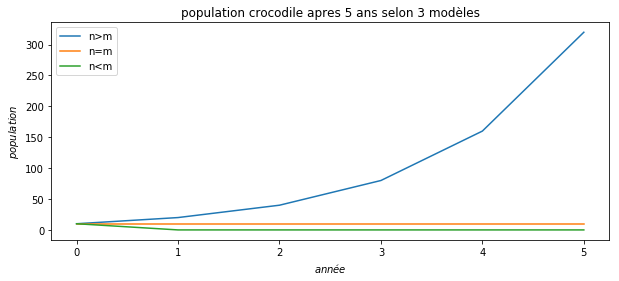

In [6]:
# Mettre le code de la courbe ici
fig, ax = plt.subplots(1,1,figsize=(10,4))

X=np.linspace(0,5,6)
ax.plot(X,modele_M(10,1,2,5),label="n>m")
ax.plot(X,modele_M(10,1,1,5),label="n=m")
ax.plot(X,modele_M(10,2,1,5),label="n<m")
ax.legend()
ax.set_ylabel("$population$")
ax.set_xlabel("$année$")
ax.set_title("population crocodile apres 5 ans selon 3 modèles")

<a id=modeleAEO> </a>
### IB - Modèle Adulte/enfant/nouveaux nés

<div style="color : #414141;background:#c5f5da; border-radius:5px; padding: 8px; margin: 4px; font-style: italic;">
On sépare la population en 3 catégories :
    <ul>
    <li>les adultes, qui se reproduisent et qui ont une mortalité faible,</li>
    <li>les enfants, qui ne se reproduisent pas et ont une mortalité moyenne,</li>
    <li>les œufs et les nouveaux-nés qui ne reproduisent pas non plus et ont une mortalité très élevée.</li>
    </ul></div>

Notons $A[k]$ le nombre d'adultes au bout de $k$ années, $E[k]$ le nombre d'enfants au même instant et $O[k]$ le nombre d'œufs/nouveaux nés. On a alors la relation de récurrence suivante :

<div style="color : black;background:#f5c5c8; border-radius:5px; padding: 8px; margin: 4px;">
\begin{equation}\left\{\begin{aligned}
A[k+1] &= A[k] - \text{morts} + \text{enfants devenus adultes} & & = A[k] - m_A A[k] + \frac{1-m_E}{d_E} E[k] \\
E[k+1] &= E[k] - \text{morts} - \text{enfants devenus adultes} +\text{nouveaux nés devenus enfants} & & = E[k] - m_E E[k] - \frac{1-m_E}{d_E} E[k] +(1-m_O)O[k] \\
O[k+1] &= \text{nouvelles naissances} & & = \min(n_A A[k],S)
\end{aligned}\right.\end{equation}
</div>

où les constantes $m_A$, $m_E$, $m_0$, $d_E$, $n_A$ et $S$ sont toutes strictement positives et représentent:

* $m_A$, $m_E$ et $m_O$ : mortalité des adultes, enfants et œufs, respectivement
* $d_E$ : durée de l'enfance
* $n_A$ : taux de naissance
* $S$ : capacité de l'environnement.

<div style="color : #414141;background:#c5f5da; border-radius:5px; padding: 8px; margin: 4px; font-style: italic;">
Remarques :<ul>
    <li>La zone où les crocodiles pondent et couvent leur œufs est limitée, $S$ représente cette limite.</li>
    <li>L'enfance dure environ 12 ans donc environ 1/12 des enfants deviennent adultes chaque année ; ce phénomène est décrit par le terme $\frac{1-m_E}{d_E}$ qui tient compte à la fois de la durée de l'enfance et de la mortalité.</li>
</ul></div>

**Question IB-1**  
Ecrire une fonction `modele_AEO` qui :
* prend en argument :
    * le nombre intial d'adultes `A0`, le nombre initial d'enfants `E0` et le nombre initial d'œufs `O0`,
    * les coefficients `mA`, `mE`, `mO`, `dE`, `nA` et `S`
    * un nombre d'années `L` à simuler,
* calcule et renvoie trois tableaux de dimension 1 à $L+1$ éléments, `A`, `E` et `O`, tels que `A[k]` soit le nombre d'adultes au début de l'année `k`, `E[k]` le nombre d'enfants au même instant et `O[k]` le nombre d'œufs au même instant.

*Indication* : si `a` et `b` sont deux nombres, la comande `min(a,b)` renvoie le minimum de ces deux nombres.

In [35]:
# METTRE VOTRE CODE ICI
def modele_AEO(A0, E0, O0, mA, mE, mO, dE, nA, S, L):
    A = np.zeros(L+1)
    E = np.zeros(L+1)
    O = np.zeros(L+1)
    A[0] = A0
    E[0] = E0
    O[0] = O0
    
    for i in range(1,L+1):
        
        A[i] = A[i-1] - mA*A[i-1] + ( ((1-mE)/dE) * E[i-1] )
        
        E[i] = E[i-1] - mE*E[i-1] - ( ((1-mE)/dE) * E[i-1] ) + ((1-mO)*O[i-1])
        
        O[i] = min((nA*A[i-1]),S)
        
    return A,E,O

**Question IB-2**
Tracer l'évolutions des populations en fonction du temps pour les paramètres donnés dans la cellule suivante :

In [37]:
# PARAMETRES A UTILISER - NE PAS MODIFIER
Oeq = 126.20494165637257
Eeq = 636.5828212403098
Aeq = 225.96133177564667

mA = 0.15; mE = 0.14; mO=0.87
S = Oeq/(1-mO)
A0=Aeq; E0=Eeq; O0 = S

dE=12
nA=13.2/2.

L = 100

Text(0.5,1,'population crocodile')

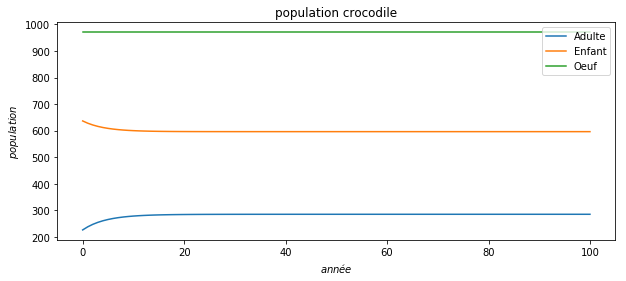

In [38]:
# METTRE ICI LE CODE DU GRAPHE
Z = modele_AEO(A0, E0, O0, mA, mE, mO, dE, nA, S, L)
fig, ax = plt.subplots(1,1,figsize=(10,4))

X=np.linspace(0,L,L+1)
ax.plot(X,Z[0],label="Adulte")
ax.plot(X,Z[1],label="Enfant")
ax.plot(X,Z[2],label="Oeuf")
ax.legend()
ax.set_ylabel("$population$")
ax.set_xlabel("$année$")
ax.set_title("population crocodile")

<a id="sexe"></a>
## II - Prise en compte du sexe des crocodiles

<a id="modele_HM"></a>
### IIA - Prise en compte dans la reproduction
<div style="color : #414141;background:#c5f5da; border-radius:5px; padding: 8px; margin: 4px; font-style: italic;">
Un crocodile mâle est capable de féconder beaucoup de femelles. En réalité, le nombre d'œufs pondus dépend uniquement du nombre de femelles adultes (le nombre de mâles n'est jamais limitant). Chaque femelle pond $C=2n_A$ oeufs tant qu'il y a de la place pour pondre.

Nous allons donc séparer les catégories "enfants" et "adultes" en fonction du sexe : $A_F$ désignera le nombre d'adultes de sexe féminin, $A_M$ désignera le nombre d'adultes de sexe masculin, $E_F$ sera le nombre d'enfants de sexe féminin et $E_M$ celui d'enfants de sexe masculin. Les œufs auront $50\%$ de chance de devenir des enfants masculins et $50\%$ de chance de devenir des enfants féminins.
</div>

La nouvelle relation de récurrence s'écrit :
<div style="color : black;background:#f5c5c8; border-radius:5px; padding: 8px; margin: 4px;">
\begin{equation}
\left\{
\begin{aligned}
A_F[k+1] &= A_F[k] - m_A A_F[k] + \frac{1-m_E}{d_E} E_F[k] \\
A_M[k+1] &= A_M[k] - m_A A_M[k] + \frac{1-m_E}{d_E} E_M[k] \\
E_F[k+1] &= E_F[k] - m_E E_F[k] - \frac{1-m_E}{d_E} E_F[k] +\frac{1-m_O}{2} O[k] \\
E_M[k+1] &= E_M[k] - m_E E_M[k] - \frac{1-m_E}{d_E} E_M[k] +\frac{1-m_O}{2} O[k] \\
O[k+1] & = \min(C\times A_F[k], S) \quad \text{ avec $C = 2n_A$}
\end{aligned}
\right.
\end{equation}
</div>


**Question IIA-1**  
Ecrire une fonction `modele_sexue` qui :
   * prend en argument :
        * le nombre intial d'adultes de sexe féminin, `AF0`, et masculin, `AM0`,
        * le nombre intial d'enfants de sexe féminin, `EF0`, et masculin, `EM0`,
        * le nombre initial d'œufs, `O0`,
        * les coefficients `mA`, `mE`, `mO`, `dE`, `nA` et `S`,
        * un nombre d'années $L$ à simuler,
   * calcule et renvoie cinq tableaux de dimension 1 à $L+1$ éléments, `AF`, `AM`, `EF`, `EM` et `O`, tels que `AF[k]` et `AM[k]` soient les nombres d'adultes de sexes féminin et masculin, respectivement, au début de l'année `k`, `EF[k]` et `EM[k]` les nombres d'enfants de sexes féminin et masculin, respectivement, au même instant `k`, et `O[k]` le nombre d'œufs au même instant.



In [32]:
# METTRE VOTRE CODE ICI
def modele_sexue(AF0,AM0,EF0,EM0,O0,mA,mE,mO,dE,C,S,L):
    #Allocation des tableaux
    AF = np.zeros(L+1)
    AM = np.zeros(L+1)
    EF = np.zeros(L+1)
    EM = np.zeros(L+1)
    O = np.zeros(L+1)
    #Initialisation des tableaux
    AF[0] = AM0
    AM[0] = AF0
    EM[0] = EM0
    EF[0] = EF0
    O[0] = O0
    #remplissage des tableaux
    for i in range(1,L+1):
        
        AF[i] = AF[i-1] - mA*AF[i-1] + ((1-mE)/dE) * EF[i-1]
        AM[i] = AM[i-1] - mA*AM[i-1] + ((1-mE)/dE) * EM[i-1]
        EF[i] = EF[i-1] - mE*EF[i-1] - ((1-mE)/dE) * EF[i-1] + ((1-mO)/2)*O[i-1]
        EM[i] = EM[i-1] - mE*EM[i-1] - ((1-mE)/dE) * EM[i-1] + ((1-mO)/2)*O[i-1]
        O[i] = min(C*AF[i-1],S)
        
    return AF,AM,EF,EM,O

**Question IIA-2**  
Pour les paramètres suivants, tracer sur un même graphique l'évolution du nombre *total* d'adultes `A` en fonction du temps (noter que `A = AF + AM`), l'évolution du nombre *total* d'enfants `E` (de même, `E = EF + EM`) et celle du nombre d'œufs `O`.

In [39]:
# Paramètres - NE PAS MODIFIER
Oeq = 126.20494165637257
Eeq = 636.5828212403098
Aeq = 225.96133177564667

AF0 = Aeq/2; AM0 = Aeq/2
EF0 = Eeq/2; EM0 = Eeq/2

mA = 0.15; mE = 0.14; mO=0.87
S = Oeq/(1-mO); O0 = S

dE=12
C=13.2 # Nombre d'oeuf pondus par les femelles = 2*nA

L = 100

In [49]:
Z = modele_sexue(AF0,AM0,EF0,EM0,O0,mA,mE,mO,dE,C,S,L)
A = Z[0]+Z[1]
E = Z[2]+Z[3]

Text(0.5,1,'population crocodile')

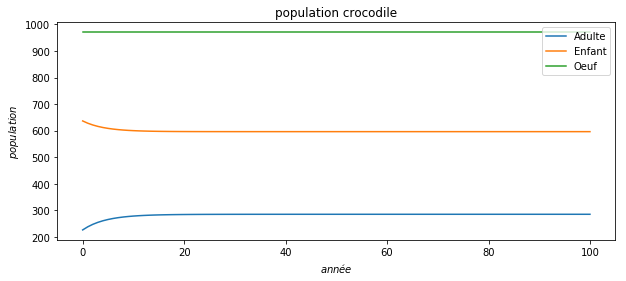

In [50]:
# METTRE LE CODE DU GRAPHE ICI
Z = modele_sexue(AF0,AM0,EF0,EM0,O0,mA,mE,mO,dE,C,S,L)
fig, ax = plt.subplots(1,1,figsize=(10,4))

X=np.linspace(0,L,L+1)
ax.plot(X,A,label="Adulte")
ax.plot(X,E,label="Enfant")
ax.plot(X,Z[4],label="Oeuf")
ax.legend()
ax.set_ylabel("$population$")
ax.set_xlabel("$année$")
ax.set_title("population crocodile")

<a id="modele_TSD"></a>
### IIB - Détermination du sexe par la température (TSD)

<div style="color : #414141;background:#c5f5da; border-radius:5px; padding: 8px; margin: 4px; font-style: italic;">
Chez les crocodiles, la détermination du sexe d'un nouveau né n'est pas génétique, contrairement à la plupart des animaux (au contraire des mamifères où, généralement, les chromosomes X/Y déterminent le sexe).

Pour les crocodiles, les œufs sont pondus sur la rive d'une rivière et il y a trois possibilités :<ul>
    <li>Tout prêt de l'eau, la température est plus basse et les œufs pondus tout près de l'eau donnent tous des individus femelles,</li>
    <li>Un peu plus loin, la température est intermédiaire et les œufs pondus dans cette zone intermédiaire donnent 50% d'individus femelles et 50% d'indivudus males.</li>
    <li>Encore plus loin de l'eau, la température est plus élevée et tous les œufs donneront des individus males.</li>
    </ul></div>

Pour représenter cela, nous allons séparer la catégorie des "œufs/nouveaux-nés" en 3 :
* `O1` représente les œufs pondus en bas de la rive (zone 1) et qui seront tous féminins,
* `O2` représente les œufs pondus au milieu de la rive (zone 2) et qui seront pour moitié masculin et pour moitié féminin,
* `O3` représente les œufs pondus en haut de la rive (zone 3) et qui seront tous masculins.

On suppose que chacune de ces régions a une capacité maximale d'œufs, représentée par des constantes `S1`, `S2` et `S3`, et que le nombre moyen d'œufs pondu par une adulte femelle vaut `C`.

<div style="color : black;background:#f5c5c8; border-radius:5px; padding: 8px; margin: 4px;">
On a donc les relations suivantes pour les enfants et les adultes :    
\begin{equation}\left\{\begin{aligned}
A_F[k+1] &= A_F[k] - m_A A_F[k] + \frac{1-m_E}{d_E} E_F[k] \\
A_M[k+1] &= A_M[k] - m_A A_M[k] + \frac{1-m_E}{d_E} E_M[k] \\
E_F[k+1] &= E_F[k] - m_E E_F[k] - \frac{1-m_E}{d_E} E_F[k] +(1-m_O) \bigl(O_1[k]+ 0.5\times O_2[k]\bigr) \\
E_M[k+1] &= E_M[k] - m_E E_M[k] - \frac{1-m_E}{d_E} E_M[k] +(1-m_O) \bigl(O_3[k]+ 0.5\times O_2[k]\bigr) \\
\end{aligned}\right.\end{equation}
    
Pour calculer le nouveau nombre d'œufs (O1[k+1], O2[k+1] et O3[k+1]), il faudra faire comme suit :<ul>
<li> On initialise O1[k+1], O2[k+1] et O3[k+1] à 0 (tous les 3).</li>
<li> Pour chaque adulte femelle à l'instant $k$ (il y en a $A_F[k]$) :
    <ul>
    <li>Si O1[k+1] < S1 : on dit qu'il reste de la place dans la zone basse et la femelle y pond ses œufs : O1[k+1] augmente de C,</li>
    <li>Sinon, si O2[k+1] < S2 : on dit qu'il reste de la place dans la zone du milieu et la femelle y pond ses œufs : O2[k+1] augmente de C,</li>
    <li>Sinon, si O3[k+1] < S3 : on dit qu'il reste de la place dans la zone haute et la femelle y pond ses œufs : O3[k+1] augmente de C,</li
    <li>Sinon, la femelle ne pond pas d'œufs (plus de place pour pondre et couver).</li>
    </ul>
    </li></ul></div>

**Question IIB-1**

Écrire une fonction `modele_TSD` qui :
* prend en argument :
    * le nombre intial d'adultes de sexe féminin, `AF0`, et masculin, `AM0`,
    * le nombre intial d'enfants de sexe féminin, `EF0`, et masculin, `EM0`,
    * le nombre initial d'œufs, `O10`, `O20` et `O30`, pondus dans chacune des trois zones,
    * les coefficients `mA`, `mE`, `mO`, `dE`, `S1`, `S2`, `S3` et `C`,
    * un nombre d'années $L$ à simuler,
* calcule et renvoie sept tableaux de dimension 1 à $L+1$ éléments : `AF`, `AM`, `EF`, `EM`, `O1`, `O2` et `O3`, tels que `AF[k]` et `AM[k]` soient les nombres d'adultes de sexes féminin et masculin, respectivement, au début de l'année `k`, `EF[k]` et `EM[k]` les nombres d'enfants de sexes féminin et masculin, respectivement, au même instant `k`, et `O1[k]`, `O2[k]` et `O3[k]` le nombre d'œufs en zones 1, 2 et 3, respectivement, au même instant `k`.

In [90]:
# Mettre votre code ici
def modele_TSD(AF0,AM0,EF0,EM0,O10,O20,O30,mA,mE,mO,dE,S1,S2,S3,C,L):
    
    #Allocation des tableaux
    AF = np.zeros(L+1)
    AM = np.zeros(L+1)
    EF = np.zeros(L+1)
    EM = np.zeros(L+1)
    O1 = np.zeros(L+1)
    O2 = np.zeros(L+1)
    O3 = np.zeros(L+1)
    
    #Initialisation des tableaux
    AF[0] = AF0
    AM[0] = AM0
    EF[0] = EF0
    EM[0] = EM0
    O1[0] = O10
    O2[0] = O20
    O3[0] = O30
    
    #Boucle principale
    for i in range(1,L+1):
    
    #remplissage des tableaux de population
        AF[i] = AF[i-1] - mA*AF[i-1] + ((1-mE)/dE) * EF[i-1]
        AM[i] = AM[i-1] - mA*AM[i-1] + ((1-mE)/dE) * EM[i-1]
        EF[i] = EF[i-1] - mE*EF[i-1] - ((1-mE)/dE) * EF[i-1] + ((1-mO)/2)*(O1[i-1]+0.5*O2[i-1])
        EM[i] = EM[i-1] - mE*EM[i-1] - ((1-mE)/dE) * EM[i-1] + ((1-mO)/2)*(O3[i-1]+0.5*O2[i-1])
        
    #remplissage des oeufs
        O1[i] = 0
        O2[i] = 0
        O3[i] = 0
        
        if (O1[i] < S1):
            O1[i] = O1[i]+C
        elif (O2[i] < S2):
            O2[i] = O2[i]+C
        elif (O3[i] < S3):
            O3[i]=O3[i]+C
            
    return AF,AM,EF,EM,O1,O2,O3

**Question IIB-2**  
Pour les paramètres suivants, tracer sur un même graphique l'évolution du nombre *total* d'adultes `A` en fonction du temps (noter que `A = AF + AM`), l'évolution du nombre *total* d'enfants `E` (de même, `E = EF + EM`) et celle du nombre *total* d'œufs `O` (`O = O1 + O2 + O3`).

In [82]:
# Paramètres - NE PAS MODIFIER
Oeq = 126.20494165637257
Eeq = 636.5828212403098
Aeq = 225.96133177564667

AF0 = Aeq/2; AM0 = Aeq/2
EF0 = Eeq/2; EM0 = Eeq/2

mA = 0.15; mE = 0.14; mO=0.87
pondus = Oeq/(1-mO)

O10 = 0.797*pondus; O20=0.136*pondus; O30=0.067*pondus
C = 13.2

S1 = 0.797*pondus; S2 = 0.136*pondus; S3 = 0.067*pondus

dE = 12

L = 100

In [91]:
Z = modele_TSD(AF0,AM0,EF0,EM0,O10,O20,O30,mA,mE,mO,dE,S1,S2,S3,C,L)
Z[-1],Z[-2],Z[-3]

(array([65.04408532,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0. 

In [ ]:
# METTRE LE CODE DU GRAPHE ICI


<a id="modele_crise"></a>
## III - Impact d'une crise environnementale

<div style="color : #414141;background:#c5f5da; border-radius:5px; padding: 8px; margin: 4px; font-style: italic;">
On cherche à reproduire l'impact de la mort massive d'une partie de la population. 
</div>

**Question III-1**  
Reproduire les graphiques des questions IB-2 (`modele_AEO`) et IIB-2 (`modele_TSD`) pour une population initiale divisée par 10. Quelle population revient plus vite à un état normal (quelle population croit le plus vite ?) ?

    
Indication :
   * On remplacera `A0`, `E0` et `O0` par `A0/10`, `E0/10` et `O0/10` pour `modele_AEO`,
   * On remplacera `AF0`, `AM0`, `EM0`, `EF0`, `O10`, `O20` et `O30` par `AF0/10`, `AM0/10`, `EF0/10`, `EM0/10`, `O10/10`, `O20/10`, `O30/10` pour `modele_TSD`. 


In [ ]:
# METTRE VOTRE CODE ICI